In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_wn75k28.csv')
data

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

## feature engineering

In [5]:
data = data.drop(['products_purchased'], axis = 1)

In [6]:
data

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0


## EDA

In [7]:
data['buy'].unique()

array([0, 1], dtype=int64)

In [10]:
data['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

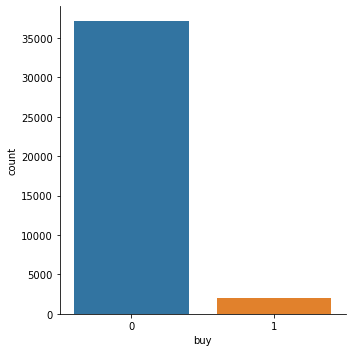

In [12]:
sns.catplot(x='buy', kind='count', data=data)

<AxesSubplot:>

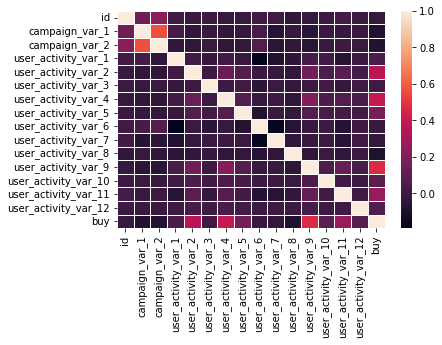

In [16]:
sns.heatmap(data.corr(), linewidth=0.5)

<b>Conclusion</b>

1. high correlation in between campaign_var_1 and campaign_var_2<br>
2. buy is somewhat correlated with user_activity_var_9, 4, 2

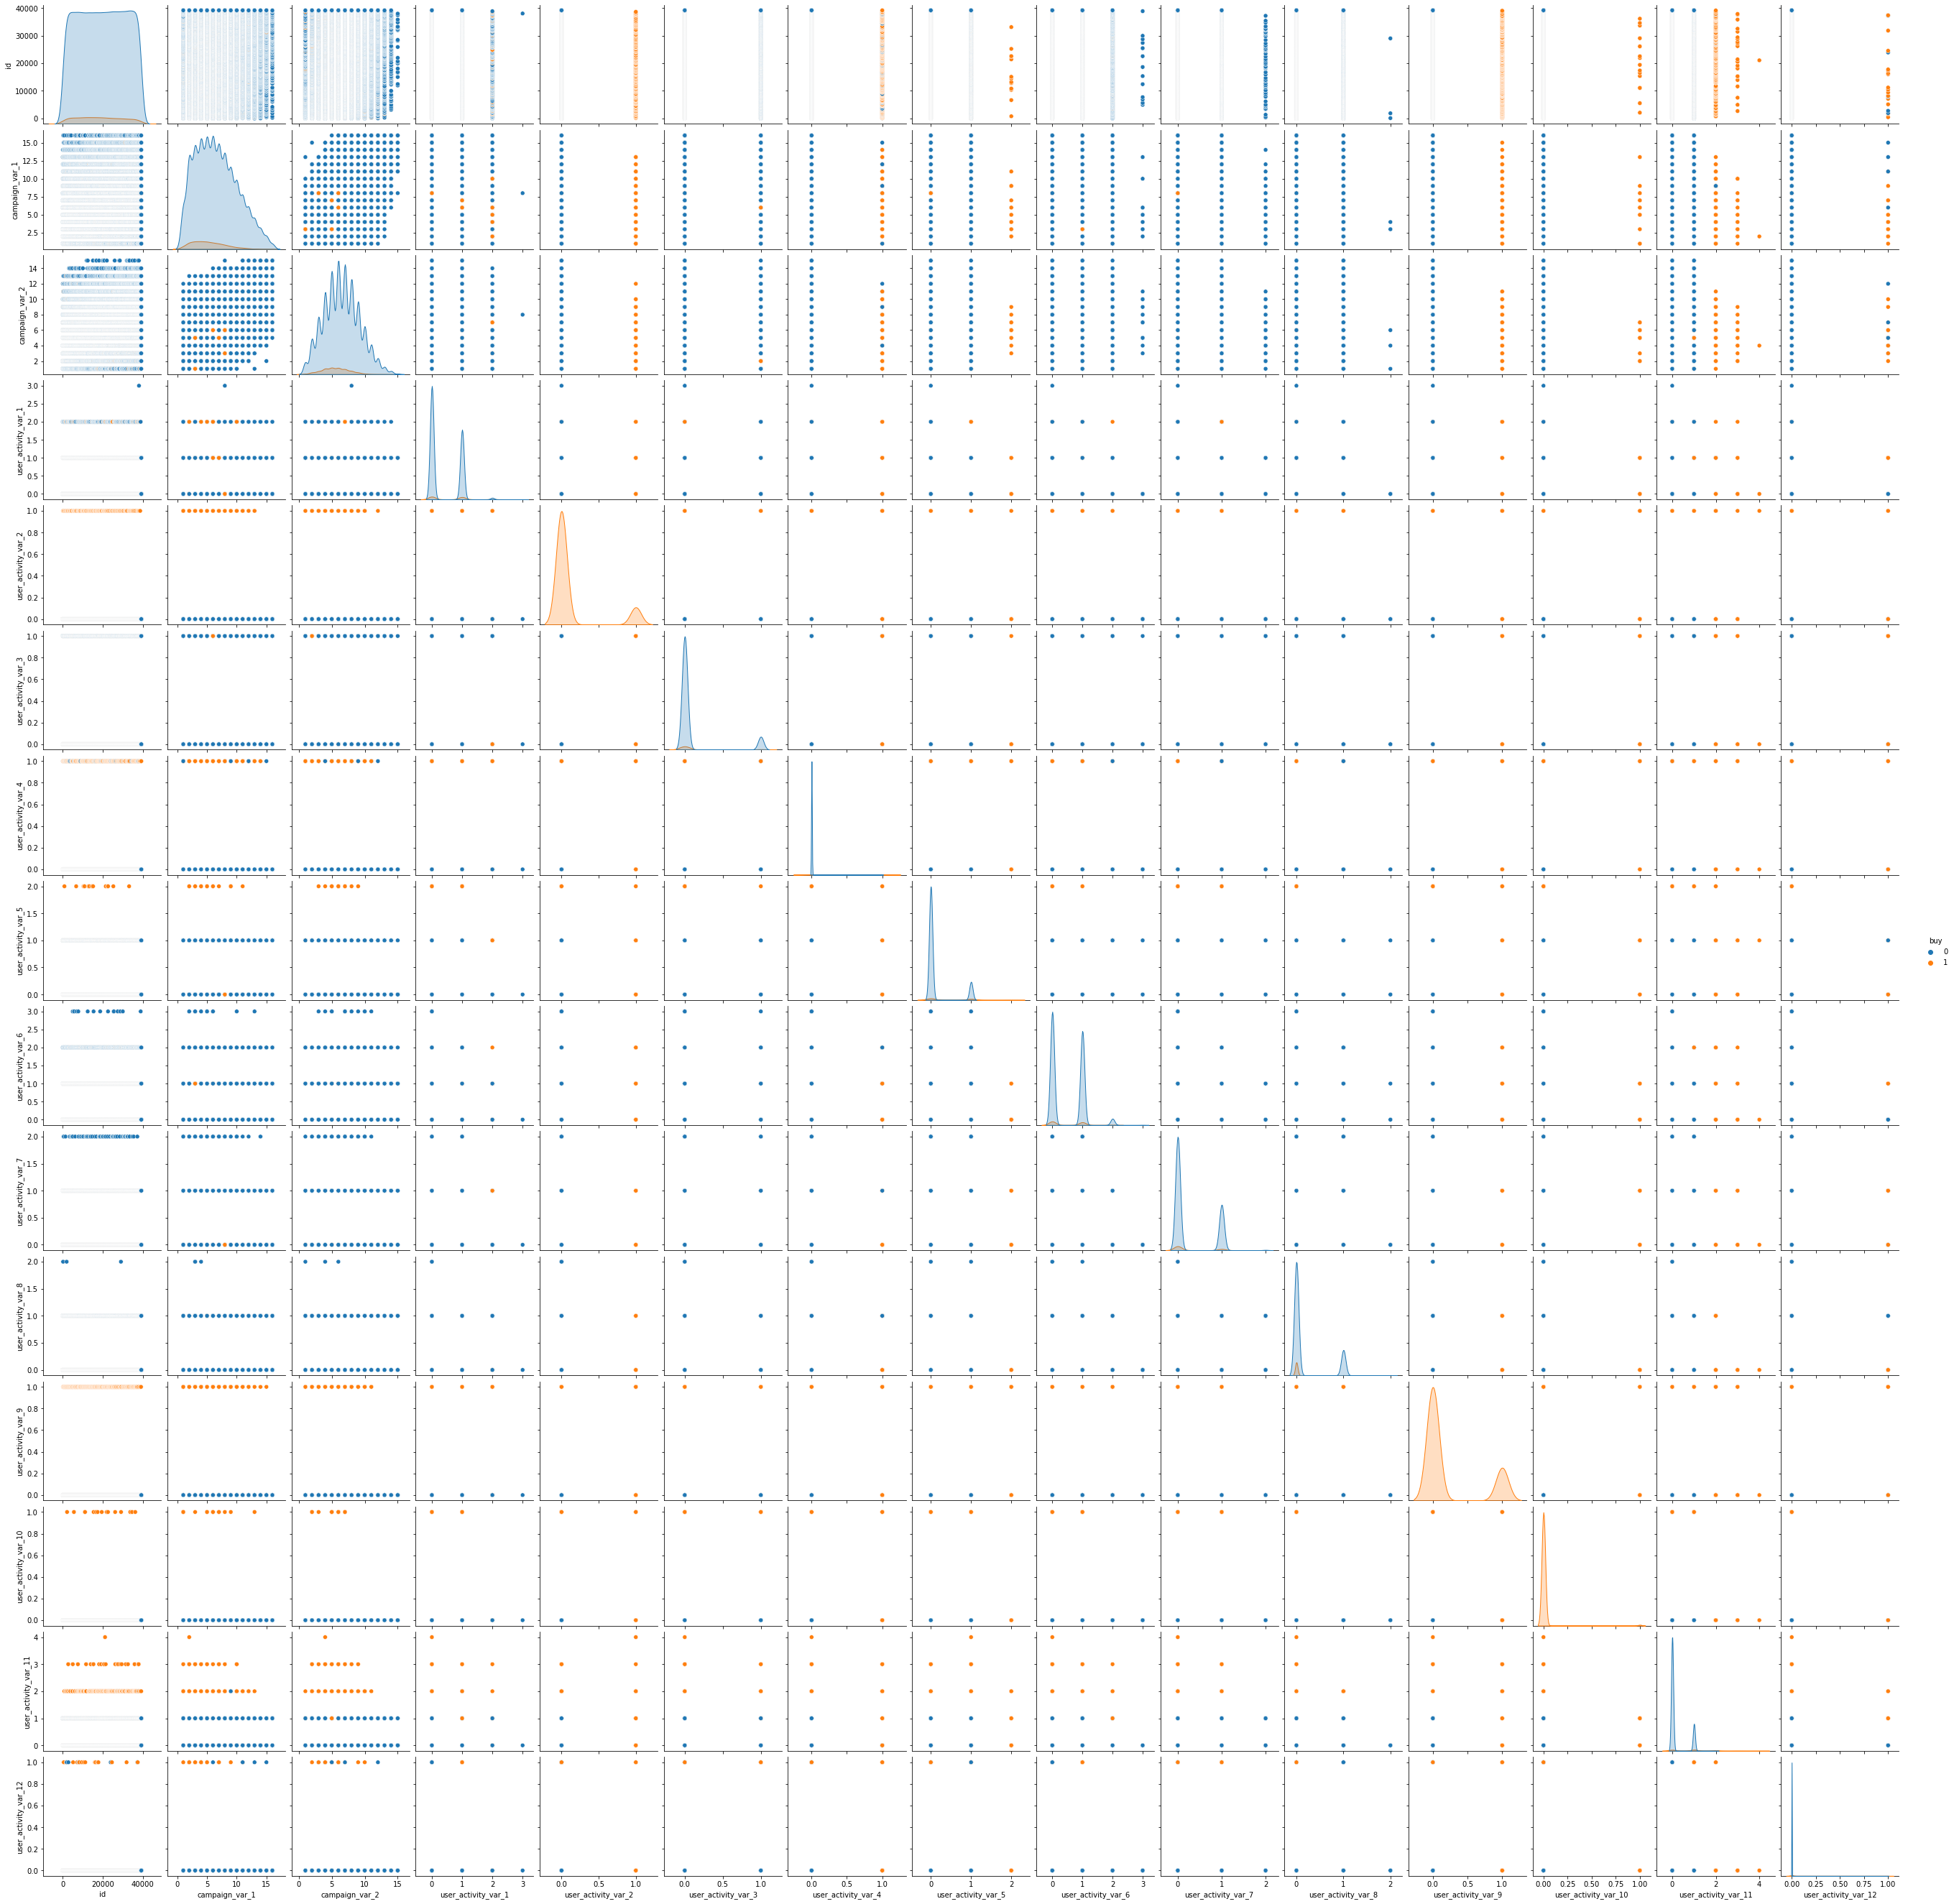

In [17]:
sns.pairplot(data, hue='buy')